# Chapter 1

The code below follows the first chapter of (Brunton and Kutz, 2022). This chapter deals with Singular Value Decomposition, an algorithm widely used in dimensionality reduction and presenting significant analogies with Principal Component Analysis, Proper Orthogoal Decomposition and other methods in disparate fields of science and engineering.

## Singular Value Decomposition
SVD offers a systematic way to determine a low dimensional approximation to high-dimensional data in terms of "dominant patterns".
> **_REMARK_**: SVD _always_ exists unlike other methods like _eigendecomposition_ 

Let's assume we have a set of images $\mathbf{X}$ where each image is denoted as $A_i \in \mathbb{C}^{n \times m}$ (meaning that each image is $m \times n$ pixels big). Then we can express the individual image as:

$$
\begin{align}
A_i = \left[
    \begin{matrix}
    a_{11} & a_{12} & ... & a_{1m}\\
    a_{21} & a_{22} & ... & a_{2m}\\
    \vdots & \vdots & \ddots & \vdots\\
    a_{n1} & a_{n2} & ... & a_{nm}\\

\end{matrix}
    \right]
\end{align}
$$

If we have a "stack" $\mathbf{X}$ of such images, say a video, we can always rearrange them into a single 2D array by converting each of them into a _tall skinny_ array of the type:

$$
\begin{align}
A_i = \left[
    \begin{matrix}
    a_{11}\\ 
    a_{12}\\
    \vdots \\
    a_{1m}\\
    a_{21}\\
    \vdots\\
    a_{2m}\\
    \vdots\\
    a_{n1}\\
    a_{n2}\\
    \vdots\\   
    a_{nm}\\
\end{matrix}
    \right]
\end{align}
$$
Then we can "stack" these arrays into a single matrix

$$
\begin{align}
\mathbf{X} = \left[
    \begin{matrix}
    | & | & ... & |\\
    A_1 & A_2 & ... & A_p \\
    | & | & ... & |
\end{matrix}
    \right]
\end{align}
$$

Under these assumptions, $\mathbf{X}$ can be decomposed into a unique set of 3 matrices $U$, $\Sigma$ and $V$ such that:

$$
\begin{align}
\mathbf{X} = U \Sigma V^T
\end{align}
$$

> **_NOTE_**: $U$ and $V$ are _unitary_ matrices (i.e. $UU^T=U^TU=I$ and $VV^T=V^TV=I$)

where $U \in \mathbb{C}^{n \times n}$ and $V \in \mathbb{C}^{m \times m}$. The columns of $U$ is are called **left singular vectors**, the columns of $V$ are called **right singular vectors** and the elements on the diagonal of $\Sigma \in \mathbb{C}^{n \times m}$ are the **eigenvalues** of $\mathbf{X}$. Now, when $n > m$, since $\Sigma$ has _at most_ $m$ non-zero elements on the diagnoal, there can only be $m$ linearly independent columns of $U$, which means that we can "economise" on the computation of the SVD of $\mathbf{X}$. In this situation we use the option `full=false`.

Let's demonstrate this with some code. First, we will import the packages `LinearAlgebra` and `Random`.

In [1]:
using LinearAlgebra, Random

Then we will instantiate a matrix $5 \times 3$ matrix we will call $A$.  

In [2]:
A = rand(5,3)

5×3 Matrix{Float64}:
 0.441728  0.753802   0.536262
 0.783393  0.812867   0.759096
 0.462473  0.414155   0.391037
 0.632406  0.0302873  0.727074
 0.525092  0.596965   0.617619

Then we will use the function `svd()` in `LinearAlgebra` to calculate the SVD of $A$.

In [3]:
U, S, V = svd(A,full=false)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×3 Matrix{Float64}:
 -0.442461  -0.430189    0.493255
 -0.60425   -0.139684   -0.430651
 -0.325154  -0.0288217  -0.619517
 -0.365191   0.88695     0.190292
 -0.447236  -0.0889672   0.388878
singular values:
3-element Vector{Float64}:
 2.246145156931217
 0.5706835584949956
 0.11001922427374078
Vt factor:
3×3 Matrix{Float64}:
 -0.572081  -0.550905   -0.607641
  0.352934  -0.834096    0.423935
 -0.740379   0.0280684   0.671604

Now, we can rewrite 

$$
\begin{align}
\mathbf{X} = U \Sigma V^T
\end{align}
$$

as 

$$
\begin{align}
A = \sum_{k=1}^{m} \sigma_k \mathbb{u}_k \mathbb{v}^T_k = \sigma_1 \mathbb{u}_1 \mathbb{v}^T_1 + \sigma_2 \mathbb{u}_2 \mathbb{v}^T_2 + ... + \sigma_m \mathbb{u}_m \mathbb{v}^T_m = \sigma_1 
\left[
\begin{matrix}
u_{11}\\
u_{12}\\
\vdots\\
u_{1,m}
\end{matrix}
\right]
\left[ \begin{matrix}v_{11} & v_{12} & \cdots & v_{1m}\end{matrix}\right] + ...
\end{align}

$$

where $\mathbb{u}_k \mathbb{v}^T_k$ are rank 1 matrices (outer product of a column vector $\mathbb{u}_k$ and a row vector $\mathbb{v}^T_k$, remember that the resulting matrix is one where each element of $\mathbb{u}_k$ mutliplies 1 row, the corresponding row, of $\mathbb{v}^T_k$ and therefore there's only 1 row and 1 column independent of the others.)


Let's verify that this is true. In our case this approximate equality needs to stand:

$$
A \approx \sigma_1 \mathbb{u}_1 \mathbb{v}^T_1 + \sigma_2 \mathbb{u}_2 \mathbb{v}^T_2  + \sigma_3 \mathbb{u}_3 \mathbb{v}^T_3
$$

In [6]:
A ≈ S[1]*U[:,1]*transpose(V[:,1])+S[2]*U[:,2]*transpose(V[:,2])+S[3]*U[:,3]*transpose(V[:,3])

true

Or, alternatively:

In [7]:
B = similar(A)

for i in 1:3
    B += S[i]*U[:,i]*transpose(V[:,i])
end

A ≈ B

true

# SVD for image reconstruction

In this section we will use SVD to compress an image. First, let's load the `Images` and `FileIO` packages.

In [7]:
using Images, FileIO, Plots, Plots, LinearAlgebra

Let's load the image of Mordecai, the snow dog

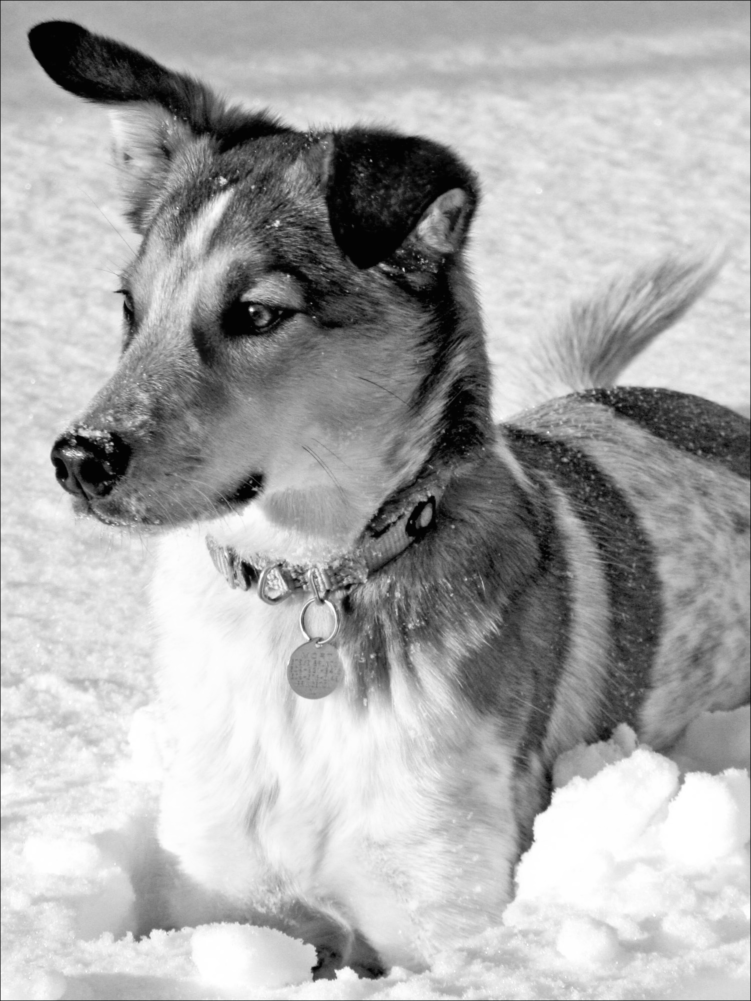

In [20]:
img = load("data/dog.jpg");
Gray.(img)

Now let's calculate the SVD

In [22]:
U,S,V = svd(Gray.(img), full=false);

Let's reconstruct the original image with an increasing number of eigenvalues/eigenvectors

┌ Warning: use values(kwargs) and keys(kwargs) instead of kwargs.data and kwargs.itr
│   caller = mosaicview(A::StackViews.StackView{Gray{Float32}, 3, 3, Tuple{OffsetArrays.OffsetMatrix{Gray{Float32}, PaddedView{Gray{Float32}, 2, Tuple{UnitRange{Int64}, UnitRange{Int64}}, Matrix{Gray{Float32}}}}, OffsetArrays.OffsetMatrix{Gray{Float32}, PaddedView{Gray{Float32}, 2, Tuple{UnitRange{Int64}, UnitRange{Int64}}, Matrix{Gray{Float32}}}}, OffsetArrays.OffsetMatrix{Gray{Float32}, PaddedView{Gray{Float32}, 2, Tuple{UnitRange{Int64}, UnitRange{Int64}}, Matrix{Gray{Float32}}}}, OffsetArrays.OffsetMatrix{Gray{N0f8}, PaddedView{Gray{N0f8}, 2, Tuple{UnitRange{Int64}, UnitRange{Int64}}, Matrix{Gray{N0f8}}}}}}; fillvalue::Gray{Float32}, npad::Int64, nrow::Int64, ncol::Int64, rowmajor::Bool, kwargs::Base.Pairs{Symbol, Vector{String}, Tuple{Symbol}, NamedTuple{(:title,), Tuple{Vector{String}}}}) at MosaicViews.jl:275
└ @ MosaicViews /Users/v1fmenol/.julia/packages/MosaicViews/BKVPm/src/MosaicViews.jl:27

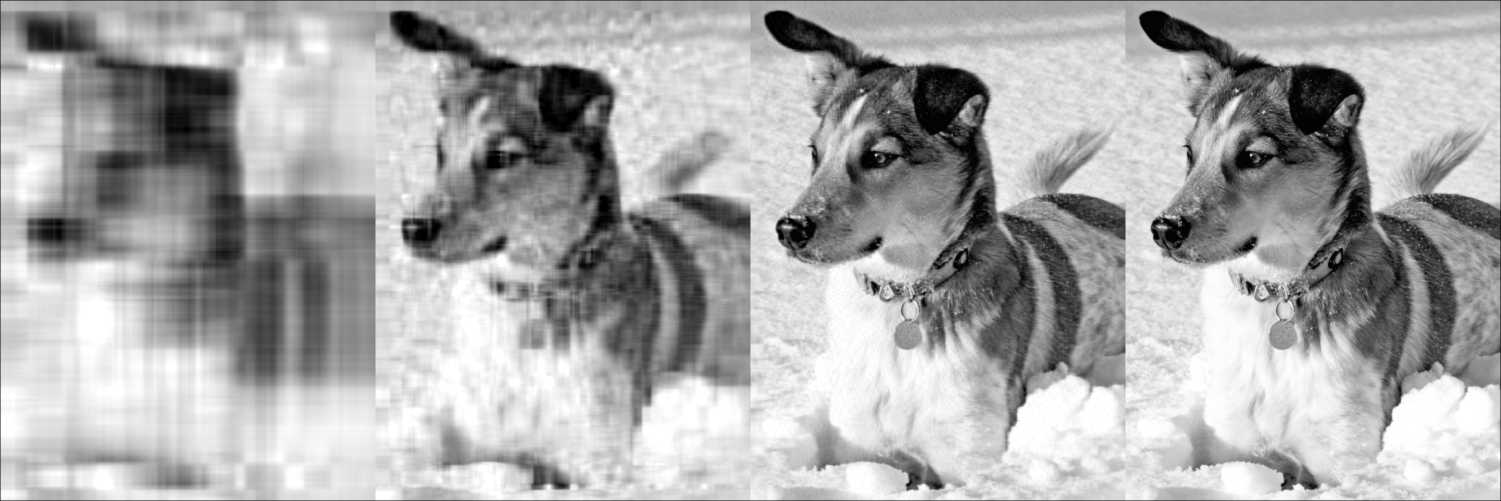

In [19]:
mosaicview(Gray.(U[:, 1:5] * Diagonal(S[1:5]) * transpose(V[:, 1:5])), Gray.(U[:, 1:20] * Diagonal(S[1:20]) * transpose(V[:, 1:20])), Gray.(U[:, 1:100] * Diagonal(S[1:100]) * transpose(V[:, 1:100])), Gray.(img), nrow=1)

Let's plot the singular values to see their relative importance.

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/v1fmenol/.julia/packages/Plots/Ra8fG/src/args.jl:1221
┌ Warning: Skipped marker arg o.
└ @ Plots /Users/v1fmenol/.julia/packages/Plots/Ra8fG/src/args.jl:1221
┌ Warning: Skipped marker arg o.
└ @ Plots /Users/v1fmenol/.julia/packages/Plots/Ra8fG/src/args.jl:1221


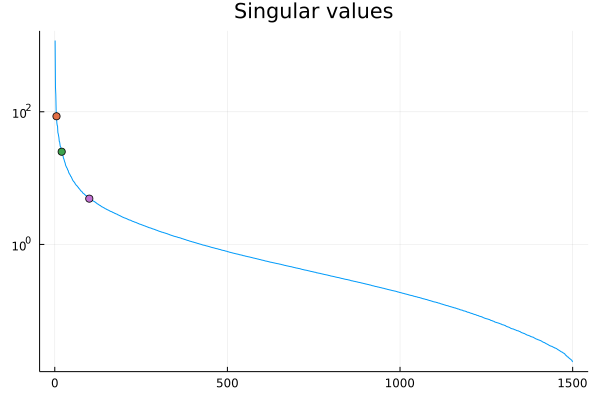

In [102]:
plot(S, yaxis=:log, legend=false, title="Singular values")
plot!([5], [S[5]], marker="o")
plot!([20], [S[20]], marker="o")
plot!([100], [S[100]], marker="o")

Let's plot the cumulative sum of the eigenvalues to check 

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/v1fmenol/.julia/packages/Plots/Ra8fG/src/args.jl:1221
┌ Warning: Skipped marker arg o.
└ @ Plots /Users/v1fmenol/.julia/packages/Plots/Ra8fG/src/args.jl:1221
┌ Warning: Skipped marker arg o.
└ @ Plots /Users/v1fmenol/.julia/packages/Plots/Ra8fG/src/args.jl:1221


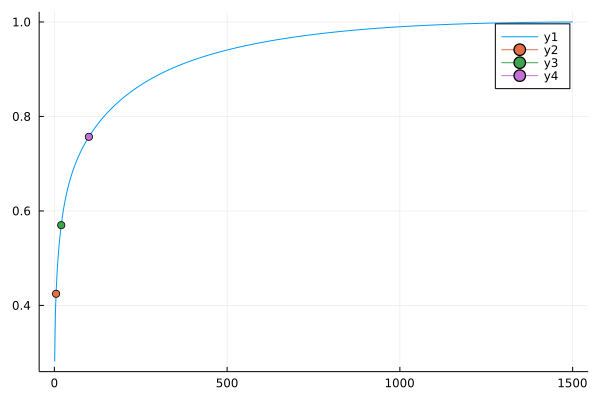

In [99]:
plot(cumsum(S)./maximum(cumsum(S)))
plot!([5], [cumsum(S)[5]./maximum(cumsum(S))], marker="o")
plot!([20], [cumsum(S)[20] ./ maximum(cumsum(S))], marker="o")
plot!([100], [cumsum(S)[100] ./ maximum(cumsum(S))], marker="o")

To recap, SVD allows us to write a matrix $\mathbf{X}$ as:

$$\mathbf{X} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$
$$
\mathbf{X} = 
\left[ 
\begin{matrix}
|&|&   &|\\
x_1 & x_2 & ... & x_m\\
|&|&   &|\\
\end{matrix}\right]
 = 
\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T =

\left[ 
\begin{matrix}
|&|&   &|\\
u_1 & u_2 & ... & u_n\\
|&|&   &|\\
\end{matrix}
\right]

\left[ 
\begin{matrix}
\sigma_1&0& ...   &0\\
0 & \sigma_2 & ... &0\\
0 & 0 & ... &\sigma_m\\
0&0& ... &0\\
\vdots& \vdots& \ddots &\vdots\\
0&0& ... &0\\
\end{matrix}
\right]

\left[ 
\begin{matrix}
- &v_1^T&- \\
- & v_2^T&- \\
& \vdots& \\
\end{matrix}
\right]
$$

Where there can only my $m$ independent columns of $\mathbf{U}$ (because there are $m$ columns of $\mathbf{X}$, so that's the column span). Also note that $\mathbf{U} \mathbf{\Sigma}$ corresponds to scaling $u_1$ by $\sigma_1$, $u_2$ by $\sigma_2$ etc.

> **_NOTE_** Matrix multiplication can essentially be reinterpreted as "row of the matrix on the right times column of the matrix on the left"

Therefore, we can select:
- The first $m$ columns of $\mathbf{U}$
- the "top $m \times m $ block" of $\mathbf{\Sigma}$
- and the rows of $\mathbf{V}^T$ 

This is also called "economy SVD".
The "Economy SVD" is still infinitely precise. I can "save" by restricting my analysis to the first $r$ eigenvalues/vectors. 

> **_NOTE_** The Eckert-Young [1936] theorem states that the best rank $r$ approximation of a matrix $\mathbf{X}$ in terms of its Frobenius-Perron norm $|| \mathbf{X} - \tilde{\mathbf{X}}||_F$ is $\tilde{\mathbf{U}} \tilde{\mathbf{\Sigma}} \tilde{\mathbf{V}}^T$, i.e. the results of SVD taking the first $r$ eigenvalues/eigenvectors.

> **_NOTE_** If I cut $\mathbf{U}$, this is not a square matrix anymore, and not a unitary matrix anymore. In fact:

$$
\tilde{\mathbf{U}}\tilde{\mathbf{U}}^T \neq \mathbb{I}
$$
but
$$
\tilde{\mathbf{U}}^T\tilde{\mathbf{U}} = \mathbb{I}
$$

> **_NOTE_** Frobenius norm of a matrix $\mathbf{A}$, $||A||_F$ is $\sqrt{\sum_{i,j}A_{i,j}^2}$. This is equivalent to "linearising" the matrix $\mathbf{A}$ and calculating the norm 2 of the vector.